# Logistic Regression

In this exercise, you will implement logistic regression and apply it to two different datasets. 


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)
  - [ 2.6 Learning parameters using gradient descent ](#2.6)
  - [ 2.7 Plotting the decision boundary](#2.7)
  - [ 2.8 Evaluating logistic regression](#2.8)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Loading and visualizing the data](#3.2)
  - [ 3.3 Feature mapping](#3.3)
  - [ 3.4 Cost function for regularized logistic regression](#3.4)
  - [ 3.5 Gradient for regularized logistic regression](#3.5)
  - [ 3.6 Learning parameters using gradient descent](#3.6)
  - [ 3.7 Plotting the decision boundary](#3.7)
  - [ 3.8 Evaluating regularized logistic regression model](#3.8)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this lab. Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.


In [3]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [4]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [5]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [6]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- We use a helper function in the ``utils.py`` file to generate this plot. 

<img src="images/figure 1.png" width="450" height="450">



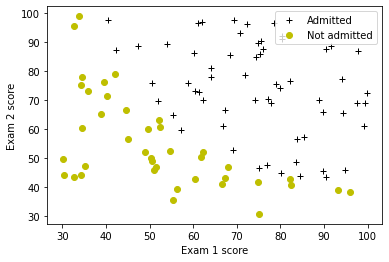

In [7]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [9]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g=1/(1+np.exp(-1*z))
    ### END SOLUTION ###  
    
    return g

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
       
   * `numpy` has a function called [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convinient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).
 
<details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
  - You can translate $e^{-z}$ into code as `np.exp(-z)` 
    
  - You can translate $1/e^{-z}$ into code as `1/np.exp(-z)` 
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `g` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate g</b></font></summary>
        <code>g = 1 / (1 + np.exp(-z))</code>
    </details>


</details>

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below. 
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give you exactly 0.5. 


In [10]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- As mentioned before, your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [11]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [26]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    total_cost=0
    for i in range(m):
        z=np.dot(w,X[i])+b
        f_wb=sigmoid(z)
        total_cost+=(y[i]*np.log(f_wb)+(1-y[i])*np.log(1-f_wb))
    total_cost=(-1/m)*total_cost    
    print(total_cost)
    ### END CODE HERE ### 


    return total_cost

<details>
<summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
* You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:

```python
    h = 0
    for i in range(m):
        h = h + 2*i
```
<br>

* In this case, you can iterate over all the examples in `X` using a for loop and add the `loss` from each iteration to a variable (`loss_sum`) initialized outside the loop.

* Then, you can return the `total_cost` as `loss_sum` divided by `m`.

* If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error. You can refer to [this topic](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) in our community for details.
     
<details>
<summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
* Here's how you can structure the overall implementation for this function
        
```python
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape

    ### START CODE HERE ###
    loss_sum = 0 
    
    # Loop over each training example
    for i in range(m): 
        
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = # Your code here to calculate w[j] * X[i][j]
            z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
        # Add the bias term to z_wb
        z_wb += b # equivalent to z_wb = z_wb + b
        
        f_wb = # Your code here to calculate prediction f_wb for a training example
        loss =  # Your code here to calculate loss for a training example
        
        loss_sum += loss # equivalent to loss_sum = loss_sum + loss
        
    total_cost = (1 / m) * loss_sum  
    ### END CODE HERE ### 
    
    return total_cost
```
<br>

If you're still stuck, you can check the hints presented below to figure out how to calculate `z_wb_ij`, `f_wb` and `cost`.

<details>
<summary><font size="2" color="darkblue"><b>Hint to calculate z_wb_ij</b></font></summary>
           &emsp; &emsp; <code>z_wb_ij = w[j]*X[i][j] </code>
</details>
        
<details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$ where $g$ is the sigmoid function. You can simply call the `sigmoid` function implemented above.
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = sigmoid(z_wb) </code>
           </details>
</details>

<details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate loss</b></font></summary>
          &emsp; &emsp; You can use the <a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html">np.log</a> function to calculate the log
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate loss</b></font></summary>
              &emsp; &emsp; You can compute loss as <code>loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)</code>
</details>
</details>
        
</details>

</details>

Run the cells below to check your implementation of the `compute_cost` function with two different initializations of the parameters $w$ and $b$

In [27]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

0.693147180559946
Cost at initial w and b (zeros): 0.693


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w and b (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [28]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

0.21833019382659788
Cost at test w and b (non-zeros): 0.218
1.3132616875182228
2.1551066763909392
0.8070937692934406
0.45296606471894846
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at test w and b (non-zeros):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, you can use the sigmoid function that you implemented above and if you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [35]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        z_wb = b+np.dot(w,X[i])
        f_wb=sigmoid(z_wb)
        err=f_wb-y[i]
        for j in range(n): 
            dj_dw[j] += err*X[i,j]
        dj_db += err
        
            
    dj_dw = (1/m)*dj_dw
    dj_db = (1/m)*dj_db
    ### END CODE HERE ###

        
    return dj_db, dj_dw

 <details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
       def compute_gradient(X, y, w, b, *argv): 
            m, n = X.shape
            dj_dw = np.zeros(w.shape)
            dj_db = 0.
        
            ### START CODE HERE ### 
            for i in range(m):
                # Calculate f_wb (exactly as you did in the compute_cost function above)
                f_wb = 
        
                # Calculate the  gradient for b from this example
                dj_db_i = # Your code here to calculate the error
        
                # add that to dj_db
                dj_db += dj_db_i
        
                # get dj_dw for each attribute
                for j in range(n):
                    # You code here to calculate the gradient from the i-th example for j-th attribute
                    dj_dw_ij =  
                    dj_dw[j] += dj_dw_ij
        
            # divide dj_db and dj_dw by total number of examples
            dj_dw = dj_dw / m
            dj_db = dj_db / m
            ### END CODE HERE ###
       
            return dj_db, dj_dw
    ```

    * If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error. You can refer to [this topic](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) in our community for details.
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb`, `dj_db_i` and `dj_dw_ij` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; Recall that you calculated f_wb in <code>compute_cost</code> above — for detailed hints on how to calculate each intermediate term, check out the hints section below that exercise
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f_wb</b></font></summary>
              &emsp; &emsp; You can calculate f_wb as
               <pre>
               for i in range(m):   
                   # Calculate f_wb (exactly how you did it in the compute_cost function above)
                   z_wb = 0
                   # Loop over each feature
                   for j in range(n): 
                       # Add the corresponding term to z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
            
                   # Add bias term 
                   z_wb += b
        
                   # Calculate the prediction from the model
                   f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
           &emsp; &emsp; You can calculate dj_db_i as <code>dj_db_i = f_wb - y[i]</code>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_ij</b></font></summary>
        &emsp; &emsp; You can calculate dj_dw_ij as <code>dj_dw_ij = (f_wb - y[i])* X[i][j]</code>
    </details>

</details>

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$ and $b$

In [36]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w and b (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at initial w and b (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [37]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953979]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at test w and b (non-zeros)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at test w and b (non-zeros):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent. 
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [41]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, try running 100,000 iterations for better results.

In [39]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

0.963790183213751
Iteration    0: Cost     0.96   
0.41987274073635056
0.30676098181551076
0.3063761314319107
0.3062502335863495
0.30614754934315863
0.30605833997587634
0.30598060422475676
0.30591285052491524
0.3058537892440183
0.3058022977803909
0.30575739863124296
0.3057182406412565
0.30568408267080205
0.30565427937092765
0.3056282687942845
0.30560556160680075
0.30558573169431524
0.30556840798448226
0.3055532673271338
0.3055400282963435
0.3055284457949727
0.3055183063578266
0.3055094240629389
0.3055016369721912
0.30549480403266666
0.30548880237902487
0.3054835249849141
0.3054788786181896
0.30547478206056455
0.3054711645574353
0.3054679644680643
0.3054651280901747
0.30546260863637753
0.3054603653427791
0.3054583626926681
0.3054565697403991
0.30545495952251184
0.3054535085448176
0.30545219633563053
0.3054510050566031
0.3054499191637248
0.3054489251120094
0.30544801109823255
0.3054471668368079
0.3054463833645307
0.30544565287046427
0.3054449685477276
0.30544432446436204
0.30544371545081

0.3052909099451855
0.30529053988260013
0.30529016982246976
0.30528979976479437
0.3052894297095741
0.305289059656809
0.3052886896064988
0.30528831955864366
0.3052879495132434
0.3052875794702985
0.30528720942980797
0.3052868393917727
0.3052864693561923
0.3052860993230668
0.3052857292923961
0.3052853592641798
0.3052849892384189
0.30528461921511235
0.3052842491942608
0.3052838791758637
0.3052835091599214
0.3052831391464337
0.3052827691354008
0.3052823991268226
0.30528202912069863
0.3052816591170297
0.3052812891158147
0.3052809191170547
0.305280549120749
0.3052801791268979
0.305279809135501
0.30527943914655864
0.3052790691600706
0.305278699176037
0.30527832919445774
0.30527795921533285
0.30527758923866216
0.3052772192644456
0.3052768492926835
0.3052764793233757
0.30527610935652205
0.3052757393921224
0.30527536943017686
0.30527499947068565
0.3052746295136484
0.3052742595590652
0.30527388960693613
0.30527351965726085
0.3052731497100399
0.3052727797652728
0.3052724098229594
0.3052720398831002


0.30512758120936806
0.3051272122295482
0.3051268432521725
0.3051264742772411
0.30512610530475376
0.3051257363347107
0.30512536736711177
0.305124998401957
0.3051246294392463
0.30512426047897956
0.3051238915211569
0.30512352256577835
0.30512315361284376
0.3051227846623532
0.3051224157143066
0.3051220467687039
0.30512167782554517
0.3051213088848302
0.305120939946559
0.30512057101073176
0.3051202020773485
0.30511983314640884
0.3051194642179129
0.30511909529186076
0.3051187263682523
0.30511835744708765
0.30511798852836647
0.3051176196120889
0.30511725069825507
0.3051168817868649
0.30511651287791797
0.30511614397141495
0.30511577506735515
0.3051154061657391
0.3051150372665663
0.3051146683698372
0.30511429947555097
0.30511393058370867
0.3051135616943096
0.30511319280735394
0.3051128239228416
0.3051124550407722
0.3051120861611462
0.3051117172839637
0.3051113484092241
0.30511097953692784
0.3051106106670749
0.3051102417996647
0.305109872934698
0.3051095040721744
0.3051091352120936
0.305108766354

0.30494928021457596
0.3049489124149087
0.304948544617674
0.30494817682287134
0.3049478090305011
0.3049474412405632
0.304947073453058
0.3049467056679847
0.30494633788534353
0.30494597010513474
0.30494560232735823
0.3049452345520139
0.30494486677910176
0.3049444990086218
0.3049441312405738
0.30494376347495805
0.304943395711774
0.30494302795102246
0.3049426601927026
0.30494229243681514
0.3049419246833591
0.3049415569323353
0.3049411891837436
0.3049408214375835
0.3049404536938553
0.30494008595255895
0.3049397182136944
0.3049393504772618
0.3049389827432609
0.30493861501169145
0.30493824728255436
0.30493787955584817
0.3049375118315742
0.30493714410973183
0.30493677639032096
0.30493640867334154
0.3049360409587939
0.30493567324667803
0.30493530553699333
0.30493493782974035
0.30493457012491865
0.3049342024225285
0.30493383472256996
0.3049334670250426
0.3049330993299467
0.3049327316372821
0.3049323639470489
0.30493199625924716
0.30493162857387635
0.3049312608909368
0.3049308932104287
0.304930525

0.30478658275116277
0.30478621602666733
0.3047858493045937
0.30478548258494165
0.3047851158677113
0.30478474915290227
0.3047843824405151
0.3047840157305492
0.30478364902300487
0.3047832823178818
0.30478291561518034
0.3047825489149004
0.30478218221704173
0.3047818155216044
0.30478144882858843
0.30478108213799393
0.3047807154498206
0.3047803487640685
0.3047799820807376
0.304779615399828
0.30477924872133966
0.30477888204527237
0.3047785153716264
0.30477814870040126
0.30477778203159755
0.3047774153652147
0.30477704870125283
0.3047766820397121
0.3047763153805923
0.3047759487238938
0.30477558206961586
0.304775215417759
0.30477484876832306
0.30477448212130803
0.30477411547671374
0.30477374883454017
0.3047733821947879
0.304773015557456
0.3047726489225449
0.3047722822900547
0.30477191565998496
0.304771549032336
0.3047711824071078
0.3047708157843004
0.3047704491639133
0.3047700825459468
0.304769715930401
0.30476934931727556
0.3047689827065709
0.3047686160982866
0.30476824949242276
0.304767882888

0.3046287485733684
0.3046283828903538
0.30462801720975075
0.3046276515315585
0.3046272858557777
0.30462692018240783
0.30462655451144915
0.3046261888429017
0.3046258231767649
0.30462545751303954
0.3046250918517251
0.30462472619282144
0.3046243605363291
0.30462399488224756
0.30462362923057684
0.3046232635813171
0.3046228979344682
0.30462253229003017
0.30462216664800307
0.30462180100838665
0.30462143537118097
0.30462106973638603
0.30462070410400194
0.3046203384740287
0.30461997284646575
0.30461960722131376
0.3046192415985724
0.30461887597824144
0.3046185103603211
0.3046181447448116
0.30461777913171245
0.30461741352102384
0.30461704791274546
0.30461668230687794
0.30461631670342054
0.3046159511023737
0.30461558550373735
0.3046152199075111
0.30461485431369545
0.30461448872229
0.304614123133295
0.30461375754671005
0.30461339196253556
0.3046130263807713
0.3046126608014171
0.30461229522447286
0.304611929649939
0.30461156407781526
0.30461119850810164
0.304610832940798
0.30461046737590475
0.30461

0.3044651636543452
0.30446479904914464
0.30446443444634447
0.3044640698459442
0.3044637052479449
0.3044633406523458
0.30446297605914724
0.3044626114683488
0.30446224687995066
0.3044618822939527
0.30446151771035523
0.3044611531291578
0.30446078855036074
0.3044604239739638
0.304460059399967
0.30445969482837026
0.3044593302591736
0.30445896569237707
0.30445860112798073
0.3044582365659844
0.304457872006388
0.3044575074491915
0.30445714289439524
0.30445677834199847
0.30445641379200206
0.30445604924440556
0.30445568469920853
0.3044553201564116
0.30445495561601443
0.3044545910780172
0.30445422654241955
0.30445386200922175
0.30445349747842354
0.30445313295002524
0.30445276842402647
0.30445240390042755
0.304452039379228
0.3044516748604281
0.30445131034402795
0.30445094583002713
0.30445058131842595
0.30445021680922435
0.3044498523024222
0.30444948779801945
0.30444912329601626
0.30444875879641237
0.3044483942992079
0.3044480298044026
0.3044476653119971
0.3044473008219905
0.30444693633438347
0.304

0.3043006064054356
0.30430024288279806
0.30429987936255004
0.30429951584469156
0.30429915232922267
0.3042987888161434
0.3042984253054536
0.3042980617971534
0.3042976982912428
0.3042973347877216
0.30429697128658983
0.3042966077878476
0.3042962442914946
0.30429588079753106
0.30429551730595694
0.304295153816772
0.3042947903299764
0.30429442684557045
0.3042940633635531
0.3042936998839255
0.30429333640668704
0.30429297293183766
0.30429260945937736
0.3042922459893065
0.3042918825216247
0.3042915190563316
0.3042911555934279
0.3042907921329133
0.3042904286747876
0.30429006521905105
0.3042897017657034
0.3042893383147447
0.3042889748661748
0.30428861141999397
0.3042882479762019
0.3042878845347988
0.3042875210957845
0.304287157659159
0.30428679422492233
0.3042864307930743
0.3042860673636152
0.3042857039365447
0.3042853405118628
0.3042849770895696
0.30428461366966536
0.30428425025214945
0.30428388683702223
0.3042835234242835
0.3042831600139333
0.3042827966059717
0.3042824332003985
0.30428206979721

0.30413653737650964
0.30413617493156836
0.30413581248900606
0.3041354500488226
0.304135087611018
0.3041347251755925
0.3041343627425456
0.3041340003118773
0.3041336378835882
0.30413327545767765
0.3041329130341456
0.3041325506129926
0.304132188194218
0.30413182577782216
0.3041314633638049
0.30413110095216644
0.3041307385429064
0.30413037613602495
0.304130013731522
0.30412965132939757
0.30412928892965174
0.30412892653228424
0.3041285641372951
0.30412820174468447
0.30412783935445215
0.3041274769665983
0.3041271145811226
0.3041267521980256
0.3041263898173067
0.30412602743896594
0.3041256650630038
0.30412530268941956
0.30412494031821363
0.3041245779493858
0.3041242155829361
0.3041238532188646
0.3041234908571711
0.30412312849785583
0.30412276614091854
0.30412240378635924
0.3041220414341781
0.3041216790843749
0.30412131673694964
0.3041209543919024
0.304120592049233
0.3041202297089415
0.30411986737102786
0.30411950503549207
0.304119142702334
0.3041187803715537
0.30411841804315143
0.304118055717

0.30397584543640804
0.3039754840453792
0.30397512265671894
0.3039747612704271
0.3039743998865033
0.30397403850494814
0.3039736771257613
0.3039733157489428
0.3039729543744924
0.3039725930024103
0.30397223163269665
0.30397187026535116
0.3039715089003736
0.3039711475377643
0.3039707861775233
0.3039704248196503
0.30397006346414573
0.30396970211100893
0.30396934076024024
0.30396897941183937
0.30396861806580683
0.30396825672214206
0.3039678953808453
0.30396753404191657
0.3039671727053558
0.30396681137116266
0.30396645003933764
0.30396608870988034
0.3039657273827908
0.3039653660580692
0.3039650047357153
0.30396464341572904
0.3039642820981106
0.3039639207828601
0.3039635594699769
0.3039631981594615
0.3039628368513138
0.3039624755455336
0.30396211424212105
0.30396175294107586
0.30396139164239844
0.3039610303460885
0.30396066905214597
0.30396030776057087
0.30395994647136326
0.3039595851845231
0.3039592239000503
0.3039588626179449
0.3039585013382068
0.30395814006083594
0.3039577787858327
0.303957

0.3038167014440151
0.30381634109518446
0.3038159807487118
0.30381562040459714
0.30381526006284065
0.303814899723442
0.30381453938640135
0.3038141790517188
0.3038138187193939
0.3038134583894274
0.30381309806181833
0.30381273773656736
0.30381237741367395
0.3038120170931389
0.3038116567749614
0.3038112964591415
0.3038109361456792
0.3038105758345752
0.30381021552582865
0.3038098552194398
0.3038094949154085
0.3038091346137349
0.30380877431441883
0.3038084140174605
0.3038080537228596
0.30380769343061614
0.30380733314073055
0.3038069728532023
0.3038066125680314
0.30380625228521807
0.30380589200476193
0.3038055317266633
0.3038051714509222
0.30380481117753855
0.30380445090651187
0.3038040906378427
0.3038037303715308
0.3038033701075762
0.3038030098459789
0.30380264958673847
0.30380228932985553
0.3038019290753297
0.30380156882316095
0.30380120857334947
0.303800848325895
0.3038004880807975
0.30380012783805727
0.3037997675976742
0.3037994073596475
0.30379904712397815
0.30379868689066575
0.303798326

0.3036562195263162
0.30365586022687124
0.30365550092977395
0.3036551416350242
0.3036547823426221
0.3036544230525676
0.3036540637648607
0.3036537044795012
0.30365334519648945
0.3036529859158253
0.30365262663750847
0.3036522673615392
0.30365190808791714
0.30365154881664275
0.3036511895477157
0.30365083028113604
0.3036504710169036
0.30365011175501855
0.303649752495481
0.30364939323829027
0.3036490339834473
0.30364867473095125
0.30364831548080257
0.30364795623300106
0.30364759698754645
0.303647237744439
0.303646878503679
0.3036465192652659
0.3036461600292001
0.303645800795481
0.3036454415641091
0.3036450823350843
0.3036447231084062
0.3036443638840753
0.3036440046620911
0.30364364544245415
0.3036432862251638
0.30364292701022044
0.30364256779762366
0.30364220858737395
0.3036418493794709
0.3036414901739148
0.3036411309707053
0.30364077176984233
0.30364041257132635
0.3036400533751569
0.3036396941813341
0.30363933498985807
0.3036389758007287
0.3036386166139456
0.3036382574295093
0.3036378982474

0.30349835418125254
0.3034979959125414
0.30349763764616766
0.30349727938213156
0.30349692112043275
0.3034965628610712
0.30349620460404736
0.3034958463493605
0.30349548809701127
0.3034951298469993
0.30349477159932453
0.303494413353987
0.3034940551109867
0.30349369687032357
0.30349333863199784
0.3034929803960091
0.3034926221623577
0.30349226393104317
0.3034919057020658
0.30349154747542567
0.30349118925112234
0.30349083102915614
0.30349047280952707
0.30349011459223485
0.3034897563772797
0.30348939816466136
0.3034890399543801
0.30348868174643534
0.30348832354082794
0.30348796533755706
0.3034876071366229
0.3034872489380258
0.30348689074176544
0.3034865325478419
0.30348617435625497
0.30348581616700465
0.3034854579800911
0.3034850997955143
0.30348474161327393
0.30348438343337053
0.3034840252558034
0.30348366708057317
0.3034833089076791
0.30348295073712167
0.3034825925689007
0.3034822344030163
0.30348187623946826
0.3034815180782567
0.30348115991938157
0.30348080176284287
0.3034804436086402
0.3

0.3033298679413113
0.3033295107709926
0.30332915360300067
0.3033287964373353
0.30332843927399644
0.30332808211298423
0.3033277249542983
0.3033273677979389
0.3033270106439061
0.3033266534921998
0.3033262963428199
0.30332593919576634
0.30332558205103916
0.30332522490863834
0.30332486776856377
0.3033245106308156
0.30332415349539366
0.3033237963622981
0.30332343923152866
0.30332308210308556
0.30332272497696844
0.30332236785317773
0.3033220107317131
0.3033216536125746
0.3033212964957621
0.3033209393812758
0.3033205822691154
0.3033202251592812
0.303319868051773
0.30331951094659065
0.3033191538437344
0.3033187967432039
0.30331843964499944
0.30331808254912085
0.30331772545556823
0.3033173683643416
0.3033170112754406
0.30331665418886533
0.3033162971046159
0.3033159400226923
0.3033155829430943
0.30331522586582227
0.3033148687908758
0.30331451171825496
0.3033141546479595
0.30331379757998994
0.30331344051434617
0.30331308345102753
0.3033127263900347
0.30331236933136735
0.30331201227502547
0.303311

0.3031729373812959
0.30317258123246926
0.3031722250859591
0.30317186894176545
0.30317151279988835
0.30317115666032757
0.30317080052308315
0.3031704443881555
0.30317008825554387
0.3031697321252488
0.30316937599727006
0.30316901987160766
0.30316866374826157
0.3031683076272316
0.30316795150851794
0.3031675953921205
0.3031672392780394
0.3031668831662744
0.3031665270568257
0.3031661709496928
0.3031658148448763
0.3031654587423757
0.3031651026421912
0.30316474654432296
0.30316439044877036
0.30316403435553413
0.3031636782646137
0.3031633221760092
0.30316296608972076
0.30316261000574807
0.30316225392409124
0.3031618978447507
0.3031615417677254
0.3031611856930163
0.30316082962062274
0.30316047355054504
0.30316011748278326
0.303159761417337
0.3031594053542065
0.3031590492933918
0.3031586932348927
0.30315833717870916
0.3031579811248414
0.30315762507328886
0.3031572690240521
0.30315691297713104
0.30315655693252513
0.3031562008902351
0.30315584485026026
0.30315548881260096
0.3031551327772573
0.30315

0.30301254898320634
0.3030121938768178
0.3030118387727354
0.3030114836709593
0.30301112857148954
0.3030107734743256
0.3030104183794679
0.30301006328691676
0.30300970819667117
0.30300935310873195
0.3030089980230988
0.3030086429397716
0.30300828785875056
0.3030079327800354
0.3030075777036263
0.303007222629523
0.3030068675577258
0.3030065124882346
0.3030061574210491
0.3030058023561693
0.30300544729359574
0.30300509223332767
0.3030047371753656
0.3030043821197092
0.3030040270663586
0.30300367201531353
0.30300331696657434
0.3030029619201409
0.3030026068760131
0.3030022518341908
0.3030018967946742
0.30300154175746324
0.30300118672255766
0.30300083168995773
0.3030004766596634
0.3030001216316744
0.30299976660599093
0.3029994115826131
0.3029990565615404
0.3029987015427734
0.30299834652631175
0.3029979915121553
0.3029976365003043
0.30299728149075866
0.30299692648351806
0.3029965714785832
0.30299621647595315
0.3029958614756285
0.302995506477609
0.30299515148189476
0.3029947964884853
0.302994441497

0.30284908910162706
0.3028487350560151
0.3028483810126991
0.302848026971679
0.3028476729329544
0.3028473188965257
0.3028469648623928
0.3028466108305557
0.3028462568010138
0.302845902773768
0.3028455487488174
0.3028451947261627
0.30284484070580364
0.30284448668774006
0.30284413267197186
0.30284377865849943
0.3028434246473224
0.3028430706384406
0.3028427166318547
0.3028423626275641
0.3028420086255687
0.30284165462586865
0.302841300628464
0.30284094663335487
0.3028405926405409
0.3028402386500223
0.30283988466179884
0.30283953067587077
0.30283917669223764
0.3028388227109001
0.3028384687318575
0.30283811475511013
0.3028377607806578
0.3028374068085007
0.30283705283863877
0.3028366988710718
0.30283634490579975
0.30283599094282276
0.3028356369821409
0.30283528302375373
0.30283492906766185
0.30283457511386463
0.30283422116236264
0.30283386721315525
0.3028335132662428
0.3028331593216252
0.30283280537930246
0.3028324514392743
0.30283209750154116
0.30283174356610276
0.30283138963295897
0.302831035

0.30268011662039085
0.3026797636696066
0.3026794107211073
0.30267905777489285
0.30267870483096365
0.3026783518893193
0.3026779989499601
0.3026776460128858
0.30267729307809627
0.3026769401455916
0.30267658721537194
0.30267623428743695
0.302675881361787
0.302675528438422
0.3026751755173416
0.3026748225985455
0.3026744696820348
0.30267411676780864
0.302673763855867
0.30267341094621
0.30267305803883765
0.3026727051337503
0.3026723522309471
0.3026719993304287
0.3026716464321948
0.3026712935362455
0.30267094064258065
0.3026705877512005
0.3026702348621044
0.302669881975293
0.30266952909076594
0.3026691762085233
0.3026688233285651
0.3026684704508913
0.3026681175755016
0.3026677647023964
0.3026674118315752
0.30266705896303875
0.3026667060967863
0.3026663532328178
0.3026660003711339
0.30266564751173397
0.3026652946546182
0.3026649417997867
0.30266458894723924
0.30266423609697585
0.30266388324899646
0.30266353040330113
0.3026631775598898
0.30266282471876255
0.30266247187991935
0.30266211904336
0.

0.30252257506446933
0.3025222231328695
0.3025218712035446
0.30252151927649507
0.30252116735172035
0.30252081542922066
0.302520463508996
0.30252011159104625
0.3025197596753712
0.30251940776197145
0.3025190558508462
0.30251870394199587
0.3025183520354204
0.3025180001311198
0.302517648229094
0.30251729632934293
0.30251694443186644
0.3025165925366647
0.3025162406437377
0.30251588875308555
0.30251553686470783
0.30251518497860497
0.3025148330947765
0.3025144812132226
0.30251412933394345
0.30251377745693875
0.30251342558220823
0.3025130737097526
0.30251272183957134
0.30251236997166464
0.3025120181060321
0.30251166624267406
0.3025113143815907
0.30251096252278126
0.30251061066624635
0.3025102588119857
0.30250990695999935
0.30250955511028743
0.30250920326284947
0.30250885141768585
0.30250849957479636
0.3025081477341814
0.3025077958958402
0.30250744405977337
0.3025070922259806
0.3025067403944619
0.3025063885652171
0.30250603673824666
0.30250568491354984
0.3025053330911274
0.3025049812709788
0.302

0.3023602245738791
0.3023598736909813
0.30235952281034784
0.3023591719319793
0.3023588210558757
0.3023584701820365
0.3023581193104621
0.3023577684411522
0.3023574175741071
0.30235706670932677
0.3023567158468107
0.30235636498655943
0.30235601412857255
0.30235566327285046
0.30235531241939284
0.3023549615681996
0.30235461071927067
0.3023542598726063
0.30235390902820636
0.30235355818607096
0.30235320734619975
0.30235285650859284
0.30235250567325045
0.3023521548401724
0.3023518040093585
0.3023514531808087
0.30235110235452334
0.3023507515305022
0.30235040070874514
0.3023500498892525
0.3023496990720241
0.30234934825705934
0.3023489974443591
0.30234864663392264
0.3023482958257506
0.30234794501984225
0.30234759421619806
0.30234724341481795
0.30234689261570186
0.3023465418188496
0.30234619102426125
0.3023458402319369
0.3023454894418762
0.30234513865407975
0.3023447878685468
0.3023444370852778
0.3023440863042727
0.3023437355255312
0.3023433847490536
0.3023430339748395
0.3023426832028895
0.3023423

0.3022032554732505
0.30220290560275553
0.30220255573451515
0.3022022058685297
0.3022018560047991
0.30220150614332336
0.3022011562841024
0.30220080642713604
0.3022004565724247
0.3022001067199678
0.3021997568697655
0.3021994070218182
0.30219905717612533
0.30219870733268717
0.3021983574915037
0.3021980076525747
0.3021976578159002
0.3021973079814803
0.3021969581493151
0.3021966083194042
0.30219625849174775
0.3021959086663459
0.30219555884319815
0.3021952090223053
0.30219485920366634
0.30219450938728204
0.30219415957315204
0.3021938097612763
0.3021934599516549
0.30219311014428785
0.30219276033917486
0.30219241053631624
0.302192060735712
0.3021917109373616
0.30219136114126555
0.3021910113474237
0.3021906615558358
0.3021903117665021
0.3021899619794224
0.3021896121945967
0.30218926241202526
0.3021889126317076
0.30218856285364415
0.3021882130778345
0.30218786330427905
0.302187513532977
0.3021871637639293
0.3021868139971353
0.30218646423259526
0.3021861144703091
0.3021857647102765
0.302185414952

0.30204359925753393
0.30204325041522195
0.3020429015751548
0.30204255273733244
0.3020422039017549
0.3020418550684221
0.3020415062373341
0.30204115740849063
0.30204080858189203
0.30204045975753807
0.30204011093542876
0.30203976211556405
0.3020394132979438
0.3020390644825684
0.3020387156694375
0.30203836685855107
0.30203801804990915
0.3020376692435118
0.30203732043935894
0.3020369716374504
0.3020366228377866
0.30203627404036676
0.30203592524519157
0.30203557645226087
0.30203522766157415
0.3020348788731321
0.3020345300869343
0.30203418130298065
0.3020338325212711
0.30203348374180605
0.3020331349645851
0.3020327861896085
0.30203243741687585
0.3020320886463874
0.3020317398781432
0.302031391112143
0.3020310423483869
0.3020306935868749
0.302030344827607
0.3020299960705829
0.302029647315803
0.30202929856326693
0.3020289498129748
0.30202860106492685
0.30202825231912245
0.30202790357556214
0.30202755483424554
0.3020272060951729
0.30202685735834406
0.30202650862375896
0.3020261598914179
0.3020258

0.30188580317425917
0.30188545534661443
0.3018851075212047
0.30188475969802986
0.30188441187708975
0.30188406405838475
0.3018837162419144
0.30188336842767904
0.30188302061567857
0.3018826728059124
0.30188232499838136
0.3018819771930849
0.30188162939002317
0.30188128158919636
0.30188093379060404
0.3018805859942464
0.3018802382001233
0.3018798904082349
0.30187954261858085
0.3018791948311617
0.30187884704597695
0.30187849926302673
0.3018781514823109
0.30187780370382955
0.3018774559275828
0.30187710815357033
0.3018767603817923
0.3018764126122487
0.30187606484493934
0.3018757170798647
0.3018753693170239
0.30187502155641754
0.3018746737980457
0.30187432604190795
0.30187397828800416
0.30187363053633504
0.30187328278690007
0.301872935039699
0.3018725872947321
0.3018722395519993
0.30187189181150076
0.30187154407323635
0.30187119633720577
0.3018708486034094
0.30187050087184697
0.3018701531425187
0.30186980541542424
0.30186945769056356
0.30186910996793703
0.30186876224754433
0.3018684145293857
0.

<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

<a name="2.7"></a>
### 2.7 Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit. If you implemented the previous parts correctly, you should see a plot similar to the following plot:   
<img src="images/figure 2.png"  width="450" height="450">

We will use a helper function in the `utils.py` file to create this plot.

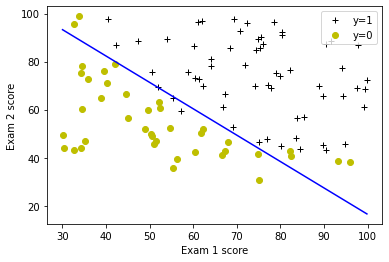

In [40]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

You will implement the `predict` function below to do this.


<a name='ex-04'></a>
### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example 
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [42]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(w,X[i])+b
        f_wb=sigmoid(z_wb)
        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    ### END CODE HERE ### 
    return p

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
       def predict(X, w, b): 
            # number of training examples
            m, n = X.shape   
            p = np.zeros(m)
   
            ### START CODE HERE ### 
            # Loop over each example
            for i in range(m):   
                
                # Calculate f_wb (exactly how you did it in the compute_cost function above) 
                # using a couple of lines of code
                f_wb = 

                # Calculate the prediction for that training example 
                p[i] = # Your code here to calculate the prediction based on f_wb
        
            ### END CODE HERE ### 
            return p
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `p[i]` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; Recall that you calculated f_wb in <code>compute_cost</code> above — for detailed hints on how to calculate each intermediate term, check out the hints section below that exercise
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f_wb</b></font></summary>
              &emsp; &emsp; You can calculate f_wb as
               <pre>
               for i in range(m):   
                   # Calculate f_wb (exactly how you did it in the compute_cost function above)
                   z_wb = 0
                   # Loop over each feature
                   for j in range(n): 
                       # Add the corresponding term to z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
            
                   # Add bias term 
                   z_wb += b
        
                   # Calculate the prediction from the model
                   f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate p[i]</b></font></summary>
           &emsp; &emsp; As an example, if you'd like to say x = 1 if y is less than 3 and 0 otherwise, you can express it in code as <code>x = y < 3 </code>. Now do the same for p[i] = 1 if f_wb >= 0.5 and 0 otherwise. 
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate p[i]</b></font></summary>
              &emsp; &emsp; You can compute p[i] as <code>p[i] = f_wb >= 0.5</code>
          </details>
    </details>

</details>

Once you have completed the function `predict`, let's run the code below to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [43]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


**Expected output** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Now let's use this to compute the accuracy on the training set

In [44]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

<a name="3"></a>
## 3 - Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. 

<a name="3.1"></a>
### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. 
- From these two tests, you would like to determine whether the microchips should be accepted or rejected. 
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

<a name="3.2"></a>
### 3.2 Loading and visualizing the data

Similar to previous parts of this exercise, let's start by loading the dataset for this task and visualizing it. 

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted 
      - `y_train = 0` if the microchip was rejected 
  - Both `X_train` and `y_train` are numpy arrays.

In [45]:
# load dataset
X_train, y_train = load_data("data/ex2data2.txt")

#### View the variables

The code below prints the first five values of `X_train` and `y_train` and the type of the variables.


In [46]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [47]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### Visualize your data

The helper function `plot_data` (from `utils.py`) is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

<img src="images/figure 3.png"  width="450" height="450">

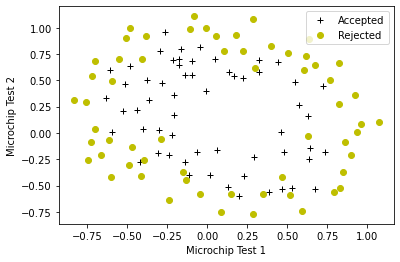

In [48]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


<a name="3.3"></a>
### 3.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector. 

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot. 
- We have provided the `map_feature` function for you in utils.py. 

In [49]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


Let's also print the first elements of `X_train` and `mapped_X` to see the tranformation.

In [50]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

<a name="3.4"></a>
### 3.4 Cost function for regularized logistic regression

In this part, you will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note that the $b$ parameter is not regularized.

<a name='ex-05'></a>
### Exercise 5

Please complete the `compute_cost_reg` function below to calculate the following term for each element in $w$ 
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

The starter code then adds this to the cost without regularization (which you computed above in `compute_cost`) to calculate the cost with regulatization.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [51]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    
    for j in range(n):
        reg_cost+=w[j]**2
    reg_cost/=(2*m)
    reg_cost*=lambda_
    
    
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
       def compute_cost_reg(X, y, w, b, lambda_ = 1):
   
           m, n = X.shape
    
            # Calls the compute_cost function that you implemented above
            cost_without_reg = compute_cost(X, y, w, b) 
    
            # You need to calculate this value
            reg_cost = 0.
    
            ### START CODE HERE ###
            for j in range(n):
                reg_cost_j = # Your code here to calculate the cost from w[j]
                reg_cost = reg_cost + reg_cost_j
            reg_cost = (lambda_/(2 * m)) * reg_cost
            ### END CODE HERE ### 
    
            # Add the regularization cost to get the total cost
            total_cost = cost_without_reg + reg_cost

        return total_cost
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `reg_cost_j` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate reg_cost_j</b></font></summary>
           &emsp; &emsp; You can use calculate reg_cost_j as <code>reg_cost_j = w[j]**2 </code> 
    </details>
        
    </details>

</details>

    

Run the cell below to check your implementation of the `compute_cost_reg` function.

In [52]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

0.6567930188982398
Regularized cost : 0.6618252552483948
0.5195437695263159
1.2585749564203166
0.6931471805599453
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Regularized cost : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradient for regularized logistic regression

In this section, you will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$ 





<a name='ex-06'></a>
### Exercise 6

Please complete the `compute_gradient_reg` function below to modify the code below to calculate the following term

$$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

The starter code will add this term to the $\frac{\partial J(\mathbf{w},b)}{\partial w}$ returned from `compute_gradient` above to get the gradient for the regularized cost function.


If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [53]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    for j in range(n):
        dj_dw[j]+=((lambda_/m)*w[j])
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
        m, n = X.shape
    
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        ### START CODE HERE ###     
        # Loop over the elements of w
        for j in range(n): 
            
            dj_dw_j_reg = # Your code here to calculate the regularization term for dj_dw[j]
            
            # Add the regularization term  to the correspoding element of dj_dw
            dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
        ### END CODE HERE ###         
        
        return dj_db, dj_dw
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `dj_dw_j_reg` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_j_reg</b></font></summary>
           &emsp; &emsp; You can use calculate dj_dw_j_reg as <code>dj_dw_j_reg = (lambda_ / m) * w[j] </code> 
    </details>
        
    </details>

</details>

    


Run the cell below to check your implementation of the `compute_gradient_reg` function.

In [54]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.0031402782673134655]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343</td> </tr>
  <tr>
      <td> <b> First few elements of regularized dj_dw:</b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548], [0.011409852883280], [0.0536273463274], [0.003140278267313]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Learning parameters using gradient descent

Similar to the previous parts, you will use your gradient descent function implemented above to learn the optimal parameters $w$,$b$. 
- If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters $w$. 
- After training our parameters, we will use it to plot the decision boundary. 

**Note**

The code block below takes quite a while to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, run for 100,000 iterations to see better results.

In [55]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

0.7209181211719665
Iteration    0: Cost     0.72   
0.7202607872908408
0.7196072782049109
0.7189575733482729
0.7183116522128336
0.7176694943490051
0.7170310793663922
0.7163963869344584
0.7157653967831807
0.7151380887036879
0.7145144425488862
0.7138944382340652
0.7132780557374971
0.7126652751010145
0.7120560764305774
0.711450439896825
0.7108483457356156
0.7102497742485478
0.709654705803473
0.7090631208349931
0.7084749998449407
0.7078903234028516
0.7073090721464196
0.706731226781942
0.7061567680847471
0.7055856768996142
0.7050179341411766
0.7044535207943151
0.7038924179145367
0.7033346066283422
0.7027800681335807
0.7022287836997922
0.7016807346685413
0.7011359024537313
0.7005942685419169
0.700055814492596
0.6995205219384973
0.698988372585851
0.6984593482146527
0.6979334306789128
0.6974106019068979
0.696890843901359
0.6963741387397532
0.6958604685744474
0.6953498156329215
0.6948421622179514
0.6943374907077899
0.6938357835563351
0.6933370232932856
0.6928411925242913
0.6923482739310927
0.69

0.6116997390781829
0.6116300597218322
0.6115605864511472
0.6114913179828225
0.6114222530420823
0.6113533903626185
0.6112847286865383
0.6112162667643043
0.6111480033546782
0.6110799372246657
0.6110120671494591
0.6109443919123848
0.6108769103048441
0.6108096211262624
0.6107425231840328
0.6106756152934635
0.6106088962777221
0.6105423649677851
0.6104760202023845
0.6104098608279533
0.6103438856985753
0.6102780936759339
0.6102124836292583
0.6101470544352748
0.6100818049781557
0.6100167341494678
0.6099518408481225
0.609887123980328
0.6098225824595385
0.6097582152064052
0.609694021148729
0.6096299992214084
0.6095661483663974
0.6095024675326534
0.6094389556760905
0.6093756117595344
0.6093124347526735
0.6092494236320146
0.609186577380834
0.6091238949891364
0.6090613754536035
0.6089990177775533
0.6089368209708953
0.6088747840500821
0.6088129060380705
0.6087511859642727
0.6086896228645162
0.6086282157809985
0.6085669637622457
0.608505865863068
0.6084449211445188
0.6083841286738518
0.60832348752447

0.5911162274630605
0.5910792370296756
0.5910422677772457
0.5910053196267739
0.5909683924997479
0.59093148631813
0.590894601004358
0.5908577364813421
0.5908208926724595
0.5907840695015549
0.590747266892933
0.5907104847713606
0.5906737230620596
0.590636981690706
0.5906002605834269
0.5905635596667962
0.5905268788678344
0.5904902181140027
0.5904535773332032
0.5904169564537733
0.5903803554044836
0.5903437741145379
0.5903072125135661
0.5902706705316246
0.5902341480991916
0.5901976451471668
0.590161161606866
0.5901246974100195
0.5900882524887707
0.5900518267756719
0.5900154202036814
0.5899790327061628
0.5899426642168805
0.5899063146699982
0.5898699840000764
0.5898336721420678
0.5897973790313198
0.589761104603565
0.589724848794924
0.589688611541902
0.5896523927813854
0.5896161924506383
0.5895800104873032
0.589543846829396
0.5895077014153035
0.5894715741837843
0.5894354650739616
0.5893993740253246
0.5893633009777248
0.589327245871374
0.5892912086468413
0.5892551892450508
0.5892191876072818
0.58

0.575796078337344
0.5757647220608525
0.5757333742073505
0.5757020347695678
0.5756707037402609
0.5756393811122165
0.5756080668782476
0.5755767610311966
0.5755454635639325
0.5755141744693523
0.5754828937403809
0.5754516213699683
0.5754203573510945
0.5753891016767644
0.57535785434001
0.5753266153338905
0.575295384651491
0.5752641622859225
0.5752329482303233
0.575201742477856
0.5751705450217113
0.5751393558551027
0.5751081749712721
0.5750770023634839
0.5750458380250298
0.5750146819492261
0.5749835341294134
0.5749523945589577
0.5749212632312488
0.5748901401397029
0.5748590252777576
0.5748279186388767
0.5747968202165478
0.5747657300042822
0.5747346479956146
0.5747035741841033
0.5746725085633314
0.5746414511269035
0.5746104018684488
0.5745793607816181
0.5745483278600869
0.5745173030975527
0.5744862864877351
0.5744552780243775
0.5744242777012434
0.5743932855121218
0.5743623014508207
0.5743313255111726
0.5743003576870308
0.5742693979722696
0.5742384463607865
0.5742075028464997
0.574176567423347

0.5620936622029947
0.5620656973660149
0.5620377390789452
0.5620097873392165
0.5619818421442616
0.5619539034915152
0.5619259713784155
0.5618980458024037
0.5618701267609211
0.5618422142514159
0.5618143082713352
0.5617864088181305
0.561758515889255
0.5617306294821653
0.5617027495943201
0.561674876223181
0.5616470093662111
0.5616191490208776
0.5615912951846495
0.5615634478549979
0.5615356070293972
0.5615077727053235
0.5614799448802567
0.5614521235516774
0.5614243087170697
0.5613965003739206
0.561368698519718
0.561340903151955
0.5613131142681237
0.5612853318657212
0.5612575559422466
0.5612297864952002
0.5612020235220856
0.5611742670204092
0.561146516987679
0.5611187734214054
0.5610910363191024
0.5610633056782841
0.5610355814964696
0.5610078637711783
0.5609801524999324
0.5609524476802575
0.5609247493096804
0.5608970573857303
0.5608693719059393
0.5608416928678414
0.5608140202689729
0.5607863541068726
0.5607586943790807
0.5607310410831422
0.5607033942166001
0.560675753777004
0.5606481197619028

0.5497829010488942
0.549757731071258
0.549732566640028
0.549707407753329
0.5496822544092861
0.5496571066060267
0.5496319643416783
0.5496068276143687
0.5495816964222283
0.5495565707633865
0.5495314506359756
0.5495063360381272
0.5494812269679746
0.5494561234236524
0.5494310254032952
0.5494059329050389
0.5493808459270207
0.5493557644673783
0.5493306885242504
0.5493056180957769
0.5492805531800992
0.5492554937753562
0.5492304398796936
0.5492053914912532
0.5491803486081788
0.549155311228617
0.549130279350713
0.5491052529726139
0.5490802320924684
0.5490552167084247
0.549030206818633
0.5490052024212436
0.5489802035144086
0.5489552100962807
0.5489302221650127
0.5489052397187596
0.5488802627556766
0.5488552912739193
0.5488303252716455
0.5488053647470134
0.5487804096981809
0.5487554601233087
0.5487305160205573
0.548705577388088
0.5486806442240638
0.5486557165266479
0.548630794294005
0.5486058775242999
0.5485809662156991
0.548556060366369
0.5485311599744782
0.5485062650381953
0.5484813755556899
0.

0.5386476452358318
0.5386248661298948
0.5386020917869498
0.5385793222054812
0.5385565573839746
0.538533797320916
0.5385110420147933
0.538488291464093
0.5384655456673046
0.5384428046229156
0.5384200683294166
0.5383973367852973
0.5383746099890493
0.538351887939163
0.5383291706341311
0.5383064580724471
0.538283750252604
0.5382610471730949
0.538238348832416
0.5382156552290622
0.5381929663615295
0.5381702822283146
0.5381476028279151
0.5381249281588285
0.538102258219554
0.5380795930085908
0.538056932524439
0.5380342767655986
0.5380116257305713
0.5379889794178587
0.537966337825964
0.5379437009533896
0.5379210687986397
0.5378984413602188
0.5378758186366314
0.5378532006263843
0.5378305873279833
0.537807978739935
0.5377853748607485
0.53776277568893
0.5377401812229902
0.5377175914614386
0.5376950064027842
0.5376724260455392
0.5376498503882147
0.5376272794293219
0.5376047131673747
0.5375821516008866
0.5375595947283716
0.5375370425483431
0.5375144950593181
0.5374919522598125
0.5374694141483416
0.53

0.5290644452677415
0.5290436242360653
0.5290228073590356
0.529001994635392
0.5289811860638756
0.5289603816432267
0.5289395813721876
0.5289187852495004
0.5288979932739073
0.5288772054441523
0.528856421758978
0.5288356422171295
0.5288148668173509
0.5287940955583877
0.5287733284389854
0.5287525654578904
0.5287318066138496
0.5287110519056099
0.5286903013319193
0.5286695548915255
0.528648812583178
0.5286280744056261
0.5286073403576187
0.5285866104379073
0.5285658846452419
0.5285451629783742
0.5285244454360555
0.5285037320170383
0.5284830227200764
0.528462317543922
0.5284416164873293
0.5284209195490526
0.5284002267278471
0.5283795380224678
0.528358853431671
0.5283381729542121
0.5283174965888495
0.5282968243343391
0.5282761561894396
0.5282554921529095
0.5282348322235071
0.5282141763999925
0.5281935246811253
0.528172877065666
0.5281522335523746
0.5281315941400143
0.5281109588273459
0.5280903276131319
0.5280697004961348
0.5280490774751192
0.5280284585488483
0.5280078437160861
0.5279872329755987

0.52036390600075
0.5203447835871274
0.5203256648241131
0.5203065497106483
0.5202874382456739
0.5202683304281319
0.5202492262569646
0.5202301257311144
0.5202110288495244
0.5201919356111381
0.5201728460148993
0.5201537600597524
0.5201346777446415
0.520115599068512
0.5200965240303097
0.5200774526289798
0.520058384863469
0.5200393207327242
0.5200202602356914
0.5200012033713203
0.5199821501385568
0.5199631005363498
0.5199440545636483
0.5199250122194017
0.5199059735025588
0.5198869384120702
0.5198679069468861
0.5198488791059572
0.5198298548882349
0.51981083429267
0.5197918173182158
0.5197728039638236
0.5197537942284471
0.5197347881110389
0.5197157856105531
0.5196967867259433
0.5196777914561643
0.5196587998001706
0.5196398117569176
0.5196208273253613
0.5196018465044576
0.5195828692931628
0.5195638956904336
0.5195449256952276
0.5195259593065025
0.5195069965232164
0.5194880373443276
0.5194690817687954
0.5194501297955786
0.5194311814236374
0.5194122366519315
0.5193932954794219
0.5193743579050686

0.5120420079000503
0.5120244400148473
0.5120068753389299
0.5119893138714066
0.5119717556113871
0.5119542005579816
0.5119366487102996
0.5119191000674523
0.5119015546285501
0.5118840123927046
0.511866473359027
0.5118489375266296
0.5118314048946239
0.5118138754621231
0.5117963492282398
0.5117788261920869
0.5117613063527783
0.5117437897094278
0.5117262762611493
0.5117087660070578
0.5116912589462674
0.5116737550778947
0.511656254401053
0.5116387569148598
0.5116212626184307
0.5116037715108823
0.5115862835913315
0.511568798858895
0.5115513173126907
0.5115338389518365
0.5115163637754496
0.5114988917826496
0.5114814229725548
0.511463957344284
0.5114464948969571
0.5114290356296937
0.5114115795416141
0.5113941266318385
0.5113766768994871
0.5113592303436822
0.5113417869635442
0.5113243467581952
0.5113069097267571
0.5112894758683525
0.5112720451821042
0.5112546176671342
0.5112371933225672
0.5112197721475261
0.5112023541411352
0.5111849393025191
0.5111675276308016
0.5111501191251083
0.51113271378456

0.4979564012556107
0.4979413089738757
0.4979262192402051
0.49791113205394555
0.497896047414444
0.49788096532104864
0.49786588577310575
0.49785080876996435
0.497835734310972
0.4978206623954769
0.49780559302282745
0.49779052619237263
0.4977754619034615
0.4977604001554429
0.4977453409476662
0.49773028427948124
0.4977152301502379
0.4977001785592863
0.4976851295059761
0.4976700829896584
0.4976550390096834
0.49763999756540306
0.49762495865616757
0.49760992228132916
0.4975948884402389
0.4975798571322484
0.49756482835671056
0.49754980211297734
0.4975347784004013
0.4975197572183342
0.4975047385661304
0.49748972244314243
0.4974747088487239
0.4974596977822288
0.49744468924300994
0.4974296832304224
0.4974146797438201
0.49739967878255753
0.49738468034598937
0.49736968443347107
0.49735469104435726
0.49733970017800344
0.497324711833766
0.4973097260109996
0.49729474270906154
0.49727976192730716
0.4972647836650931
0.49724980792177664
0.4972348346967143
0.4972198639892638
0.4972048957987819
0.4971899301

0.49167939852763665
0.49166534679996754
0.49165129735856067
0.4916372502028522
0.49162320533227777
0.49160916274627364
0.4915951224442759
0.49158108442572096
0.4915670486900459
0.491553015236687
0.49153898406508195
0.49152495517466765
0.4915109285648817
0.49149690423516096
0.49148288218494435
0.49146886241366905
0.4914548449207738
0.49144082970569586
0.4914268167678751
0.4914128061067502
0.4913987977217588
0.4913847916123407
0.4913707877779357
0.49135678621798246
0.4913427869319214
0.49132878991919166
0.4913147951792338
0.4913008027114874
0.4912868125153939
0.4912728245903927
0.4912588389359256
0.49124485555143266
0.4912308744363555
0.4912168955901361
0.4912029190122149
0.4911889447020341
0.49117497265903515
0.49116100288266074
0.4911470353723529
0.491133070127554
0.49111910714770696
0.4911051464322539
0.49109118798063844
0.49107723179230384
0.49106327786669285
0.49104932620324954
0.49103537680141757
0.49102142966064066
0.4910074847803632
0.4909935421600293
0.4909796017990836
0.4909656

0.4855265868254945
0.4855135178167212
0.4855004508562053
0.48548738594345986
0.48547432307799904
0.4854612622593362
0.485448203486986
0.48543514676046173
0.48542209207927906
0.48540903944295105
0.4853959888509932
0.48538294030292006
0.4853698937982466
0.4853568493364877
0.4853438069171594
0.4853307665397763
0.48531772820385405
0.4853046919089087
0.485291657654456
0.4852786254400122
0.48526559526509316
0.4852525671292156
0.4852395410318958
0.48522651697265007
0.48521349495099575
0.4852004749664499
0.485187457018529
0.4851744411067509
0.4851614272306331
0.4851484153896927
0.4851354055834478
0.48512239781141614
0.48510939207311576
0.48509638836806507
0.48508338669578216
0.48507038705578603
0.48505738944759474
0.48504439387072723
0.4850314003247028
0.48501840880903996
0.4850054193232594
0.4849924318668788
0.48497944643941915
0.48496646304039903
0.48495348166933905
0.4849405023257593
0.4849275250091796
0.48491454971912046
0.4849015764551026
0.4848886052166467
0.4848756360032733
0.4848626688

0.480052956994805
0.48004073139479736
0.48002850764620947
0.48001628574861716
0.4800040657015958
0.47999184750472174
0.47997963115757086
0.47996741665971926
0.4799552040107429
0.47994299321021916
0.479930784257724
0.4799185771528337
0.4799063718951258
0.47989416848417693
0.4798819669195639
0.47986976720086466
0.47985756932765605
0.47984537329951543
0.47983317911602075
0.4798209867767495
0.4798087962812799
0.4797966076291895
0.47978442082005684
0.47977223585345996
0.47976005272897715
0.4797478714461871
0.47973569200466826
0.47972351440400013
0.47971133864376064
0.4796991647235294
0.4796869926428853
0.47967482240140813
0.4796626539986765
0.4796504874342709
0.47963832270777046
0.4796261598187553
0.4796139987668048
0.47960183955150004
0.4795896821724202
0.4795775266291463
0.4795653729212586
0.4795532210483375
0.47954107100996407
0.47952892280571935
0.4795167764351834
0.4795046318979384
0.4794924891935653
0.4794803483216449
0.4794682092817591
0.47945607207349006
0.4794439366964185
0.4794318

0.474789481190813
0.4747780393896738
0.4747665992633993
0.47475516081161756
0.47474372403395865
0.47473228893005254
0.4747208554995285
0.47470942374201697
0.4746979936571472
0.47468656524455
0.474675138503855
0.47466371343469305
0.47465229003669457
0.4746408683094896
0.4746294482527093
0.47461802986598417
0.47460661314894514
0.4745951981012236
0.4745837847224498
0.4745723730122558
0.47456096297027256
0.4745495545961317
0.4745381478894643
0.4745267428499025
0.47451533947707775
0.47450393777062233
0.4744925377301679
0.4744811393553464
0.47446974264579034
0.47445834760113215
0.4744469542210039
0.47443556250503816
0.47442417245286794
0.47441278406412574
0.4744013973384445
0.47439001227545674
0.47437862887479626
0.4743672471360958
0.4743558670589892
0.47434448864310913
0.47433311188808913
0.4743217367935639
0.4743103633591659
0.4742989915845294
0.47428762146928893
0.4742762530130781
0.47426488621553103
0.4742535210762818
0.47424215759496524
0.4742307957712158
0.4742194356046675
0.4742080770

0.4699225281189247
0.4699117874499855
0.4699010483033465
0.4698903106786822
0.4698795745756669
0.46986883999397483
0.4698581069332812
0.4698473753932609
0.4698366453735882
0.46982591687393815
0.4698151898939865
0.46980446443340773
0.4697937404918771
0.4697830180690706
0.4697722971646628
0.4697615777783294
0.46975085990974635
0.4697401435585894
0.46972942872453377
0.46971871540725607
0.4697080036064317
0.4696972933217373
0.46968658455284845
0.469675877299442
0.4696651715611938
0.4696544673377807
0.4696437646288788
0.46963306343416505
0.4696223637533164
0.4696116655860095
0.4696009689319207
0.46959027379072843
0.4695795801621083
0.46956888804573826
0.46955819744129534
0.46954750834845715
0.46953682076690134
0.4695261346963046
0.4695154501363459
0.46950476708670197
0.4694940855470511
0.4694834055170717
0.4694727269964408
0.469462049984837
0.4694513744819385
0.46944070048742415
0.46943002800097144
0.4694193570222595
0.4694086875509668
0.46939801958677196
0.46938735312935403
0.4693766881783

0.46542006523428386
0.46540995309722827
0.46539984235015214
0.46538973299276815
0.46537962502478825
0.4653695184459245
0.4653594132558893
0.4653493094543956
0.46533920704115506
0.465329106015881
0.4653190063782861
0.46530890812808273
0.46529881126498396
0.46528871578870273
0.465278621698952
0.46526852899544496
0.4652584376778946
0.4652483477460145
0.4652382591995174
0.46522817203811734
0.4652180862615276
0.46520800186946204
0.46519791886163353
0.46518783723775664
0.4651777569975449
0.46516767814071186
0.46515760066697215
0.4651475245760392
0.46513744986762756
0.46512737654145114
0.4651173045972247
0.4651072340346622
0.46509716485347824
0.4650870970533873
0.4650770306341044
0.46506696559534333
0.4650569019368199
0.4650468396582481
0.46503677875934357
0.46502671923982086
0.46501666109939543
0.46500660433778224
0.46499654895469644
0.46498649494985367
0.46497644232296886
0.46496639107375826
0.46495634120193646
0.4649462927072201
0.46493624558932445
0.464926199847965
0.46491615548285875
0.4

0.4609392400676485
0.4609297343835393
0.46092022996583876
0.46091072681429457
0.46090122492865204
0.46089172430865777
0.46088222495405845
0.4608727268646002
0.46086323004003016
0.4608537344800944
0.4608442401845408
0.4608347471531144
0.4608252553855634
0.460815764881634
0.46080627564107385
0.46079678766362975
0.4607873009490487
0.4607778154970783
0.4607683313074655
0.4607588483799578
0.46074936671430233
0.460739886310247
0.460730407167539
0.46072092928592606
0.4607114526651563
0.4607019773049771
0.46069250320513644
0.46068303036538166
0.46067355878546157
0.4606640884651239
0.4606546194041165
0.4606451516021877
0.4606356850590861
0.4606262197745589
0.4606167557483558
0.46060729298022496
0.46059783146991434
0.46058837121717294
0.4605789122217489
0.4605694544833923
0.4605599980018504
0.46055054277687213
0.46054108880820777
0.4605316360956049
0.4605221846388133
0.46051273443758195
0.4605032854916601
0.46049383780079645
0.4604843913647415
0.46047494618324386
0.4604655022560529
0.46045605958

0.4570282764231494
0.45701928461583713
0.4570102939734677
0.45700130449581433
0.4569923161826509
0.4569833290337505
0.45697434304888696
0.4569653582278337
0.456956374570365
0.45694739207625407
0.45693841074527475
0.45692943057720115
0.45692045157180744
0.4569114737288671
0.4569024970481546
0.4568935215294439
0.4568845471725095
0.45687557397712497
0.4568666019430656
0.4568576310701046
0.45684866135801727
0.456839692806578
0.4568307254155608
0.456821759184741
0.45681279411389264
0.4568038302027908
0.45679486745121034
0.45678590585892564
0.45677694542571207
0.4567679861513442
0.45675902803559804
0.45675007107824717
0.4567411152790682
0.4567321606378348
0.45672320715432363
0.45671425482830896
0.4567053036595672
0.45669635364787303
0.45668740479300196
0.4566784570947299
0.4566695105528322
0.45666056516708453
0.45665162093726286
0.4566426778631429
0.4566337359445001
0.45662479518111093
0.45661585557275136
0.45660691711919693
0.45659797982022404
0.4565890436756087
0.4565801086851272
0.4565711

0.4530030040791333
0.45299452621951963
0.45298604942642134
0.45297757369963687
0.4529690990389652
0.45296062544420607
0.45295215291515806
0.45294368145162023
0.45293521105339235
0.4529267417202738
0.452918273452063
0.45290980624856003
0.45290134010956423
0.45289287503487485
0.45288441102429194
0.45287594807761483
0.4528674861946428
0.45285902537517614
0.4528505656190142
0.4528421069259566
0.45283364929580416
0.4528251927283557
0.45281673722341165
0.45280828278077156
0.4527998294002361
0.45279137708160533
0.4527829258246791
0.45277447562925766
0.4527660264951416
0.4527575784221307
0.45274913141002543
0.4527406854586266
0.4527322405677342
0.4527237967371494
0.45271535396667195
0.4527069122561028
0.4526984716052428
0.4526900320138924
0.4526815934818524
0.45267315600892377
0.4526647195949073
0.45265628423960413
0.4526478499428146
0.45263941670434055
0.4526309845239826
0.4526225534015417
0.45261412333681916
0.4526056943296161
0.45259726637973435
0.4525888394869748
0.45258041365113855
0.4525

0.4493810205822513
0.44937299229121397
0.4493649649831591
0.44935693865790666
0.4493489133152771
0.44934088895509006
0.44933286557716606
0.44932484318132515
0.44931682176738746
0.44930880133517354
0.44930078188450373
0.4492927634151983
0.4492847459270773
0.4492767294199622
0.44926871389367196
0.4492606993480291
0.4492526857828529
0.44924467319796385
0.4492366615931832
0.44922865096833203
0.44922064132323014
0.4492126326576989
0.44920462497155933
0.4491966182646324
0.4491886125367384
0.4491806077876988
0.44917260401733505
0.44916460122546725
0.44915659941191755
0.4491485985765064
0.44914059871905543
0.44913259983938597
0.44912460193731857
0.44911660501267525
0.44910860906527794
0.449100614094947
0.44909262010150414
0.4490846270847715
0.44907663504457024
0.4490686439807221
0.44906065389304856
0.4490526647813716
0.4490446766455125
0.4490366894852936
0.44902870330053646
0.4490207180910631
0.44901273385669527
0.44900475059725553
0.44899676831256463
0.448988787002446
0.44898080666672113
0.44

0.44602483621241684
0.44601721366281294
0.446009592022907
0.4460019712925368
0.44599435147154043
0.44598673255975657
0.4459791145570219
0.4459714974631758
0.4459638812780559
0.44595626600150046
0.44594865163334807
0.44594103817343655
0.4459334256216045
0.44592581397769
0.4459182032415315
0.4459105934129679
0.4459029844918369
0.4458953764779779
0.445887769371229
0.44588016317142853
0.4458725578784154
0.4458649534920281
0.44585735001210586
0.4458497474384868
0.44584214577101006
0.44583454500951436
0.4458269451538388
0.44581934620382185
0.44581174815930275
0.4458041510201205
0.4457965547861141
0.4457889594571222
0.44578136503298427
0.4457737715135395
0.4457661788986271
0.44575858718808636
0.4457509963817562
0.4457434064794755
0.44573581748108465
0.44572822938642237
0.44572064219532825
0.4457130559076418
0.44570547052320214
0.44569788604184934
0.4456903024634227
0.4456827197877616
0.445675138014706
0.44566755714409545
0.44565997717576933
0.44565239810956825
0.44564481994533117
0.4456372426

<details>
<summary>
    <b>Expected Output: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

<a name="3.7"></a>
### 3.7 Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our `plot_decision_boundary` function which plots the (non-linear) decision boundary that separates the positive and negative examples. 

- In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.

- After learning the parameters $w$,$b$, the next step is to plot a decision boundary similar to Figure 4.

<img src="images/figure 4.png"  width="450" height="450">

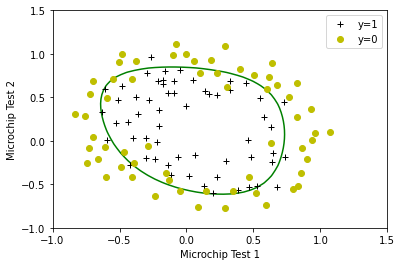

In [56]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 3.8 Evaluating regularized logistic regression model

You will use the `predict` function that you implemented above to calculate the accuracy of the regularized logistic regression model on the training set

In [57]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390


**Expected Output**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 80%</td> </tr>
</table>

**Congratulations on completing the final lab of this course! We hope to see you in Course 2 where you will use more advanced learning algorithms such as neural networks and decision trees. Keep learning!**

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://lh3.google.com/u/0/d/14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>